In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
df['quality'] = df['quality'].apply(lambda x: 3 if x > 8 else (2 if x > 6 and x < 8 else 1))
df['quality'].unique()

array([1, 2])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# build a random forest classifier model with default parameters (10)
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)


# n_estimators tells the number of trees in the forest 
# criterion tells the criterion to use to split the data
# random_state is the seed used by the random number generator

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [9]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   1   0   0   0]
 [  0   0   5   7   1   0]
 [  0   3 129  30   2   0]
 [  0   0  45 116   8   0]
 [  0   0   1  26  21   0]
 [  0   0   0   2   3   0]]


In [10]:
print('Accuracy:  ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall:    ', recall_score(y_test, y_pred, average='macro'))
print('F1-score:  ', f1_score(y_test, y_pred, average='macro'))

# average='macro' is used to calculate the metrics for each label, and find their unweighted mean.

Accuracy:   0.665
Precision:  0.3255985267034991
Recall:     0.3184126497330062
F1-score:   0.31945122103320117


/home/paritoshtripathi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='auto')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)
print('Accuracy:  ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall:    ', recall_score(y_test, y_pred, average='macro'))
print('F1-score:  ', f1_score(y_test, y_pred, average='macro'))


[[  0   0   1   0   0   0]
 [  0   0   8   5   0   0]
 [  0   0 127  34   3   0]
 [  0   0  40 120   9   0]
 [  0   0   0  25  22   1]
 [  0   0   0   1   4   0]]
Accuracy:   0.6725
Precision:  0.32486448769343507
Recall:     0.3237971248055676
F1-score:   0.32277547203351187


/home/paritoshtripathi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)
print('Accuracy:  ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall:    ', recall_score(y_test, y_pred, average='macro'))
print('F1-score:  ', f1_score(y_test, y_pred, average='macro'))

[[ 0  0  1  0  0  0]
 [ 0  1  7  4  1  0]
 [ 2 11 98 47  5  1]
 [ 0  7 38 97 22  5]
 [ 0  1  0 19 26  2]
 [ 0  0  0  2  3  0]]
Accuracy:   0.555
Precision:  0.2934434005790281
Recall:     0.2983525360401533
F1-score:   0.29436204820820205


/tmp/ipykernel_18260/2368328421.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_18260/2368328421.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


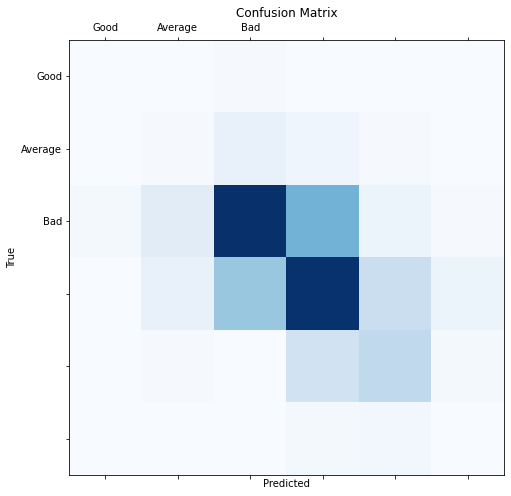

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# create a figure of given size
fig = plt.figure(figsize=(8,8))

# add a subplot
ax = fig.add_subplot(111)

# set title
ax.set_title('Confusion Matrix')

# set the labels for the confusion matrix
labels = ['Good', 'Average', 'Bad']
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

# plot the confusion matrix
ax.matshow(cm, cmap=plt.cm.Blues)

# label the axes
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

# show the confusion matrix
plt.show()